# Computational Simulation of Equivalence Class Formation Using the go/no-go Procedure with Compound Stimuli

### Abstract
Research about equivalence has commonly utilized human participants as experimental subjects. More recently, computational models have been capable of reproducing performances observed in experiments with humans. The computational model often utilized is called RELNET, and it simulates training and testing trials of conditional relations using the matching-to-sample procedure (MTS). The differentiation between sample stimulus and comparison stimuli, indispensable in MTS, implies operational difficulties for simulations. For this reason, new studies seek to utilize alternative procedures to MTS, which do not differentiate the functions of the antecedent stimuli. This work evaluated the possibility of developing a new computational model to simulate equivalence class formation using the go/no-go procedure with compound stimuli. In Experiment 1, artificial neural networks were utilized to simulate training of the AB and BC relations as well as the testing of the AC relation. The results showed that four out of six runs demonstrated equivalence class formation. Experiment 2 evaluated whether the additional class training performed in Experiment 1, which was analogous to the simulation of pre-experimental experience of human participants, would be essential for simulating the establishment of equivalence classes. It was found that it was not possible to simulate equivalence class formation without the additional class training. Altogether, the experiments show that it is possible to simulate equivalence class formation using the go/no-go procedure with compound stimuli and that it is necessary to conduct additional class training. The model developed is, therefore, an alternative to RELNET for the study of equivalence relations using computational simulations.

[article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4960284/pdf/40732_2016_Article_184.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

%matplotlib inline
plt.style.use('seaborn')

In [2]:
train_1_y=[1,1,1,1,0,1,0,1,0,1,0] 
test_1_y=[1,0,1,0]
train_2_y=[1,0,1,0,1,0,1,0]
test_2_y=[1,0,1,0]

In [3]:
def mean_sq_err(predict,real):
    return (np.mean((predict-real)**2))

In [4]:
dat=pd.read_csv("Results_1/TF_replicas.csv", 
                header=None, 
                names=(["exp_1_n_epocs",
                        "XY_1",
                        "YZ_1",
                        "XZ_1",
                        "A1B1_1",
                        "A1B2_1",
                        "B1C1_1",
                        "B1C2_1",
                        "A2B2_1",
                        "A2B1_1",
                        "B2C2_1",
                        "B2C1_1",
                        "A1C1_1",
                        "A1C2_1",
                        "A2C2_1",
                        "A2C1_1",
                        "exp_2_final_loss",
                        "exp_2_n_epocs",
                        "A1B1_2",
                        "A1B2_2",
                        "B1C1_2",
                        "B1C2_2",
                        "A2B2_2",
                        "A2B1_2",
                        "B2C2_2",
                        "B2C1_2",
                        "A1C1_2",
                        "A1C2_2",
                        "A2C2_2",
                        "A2C1_2",
                       ]))# , sep=";" # para bases en español #_hid_4_1
#dat=pd.read_csv("Results_1/test_hid_4_1.csv")# , sep=";" # para bases en español #_hid_4_1
print(len(dat))
print(list(dat.columns))

3992
['exp_1_n_epocs', 'XY_1', 'YZ_1', 'XZ_1', 'A1B1_1', 'A1B2_1', 'B1C1_1', 'B1C2_1', 'A2B2_1', 'A2B1_1', 'B2C2_1', 'B2C1_1', 'A1C1_1', 'A1C2_1', 'A2C2_1', 'A2C1_1', 'exp_2_final_loss', 'exp_2_n_epocs', 'A1B1_2', 'A1B2_2', 'B1C1_2', 'B1C2_2', 'A2B2_2', 'A2B1_2', 'B2C2_2', 'B2C1_2', 'A1C1_2', 'A1C2_2', 'A2C2_2', 'A2C1_2']


count     3992.000000
mean      5462.287575
std       1240.005964
min       3211.000000
25%       4784.750000
50%       5193.500000
75%       5804.500000
max      20000.000000
Name: exp_1_n_epocs, dtype: float64

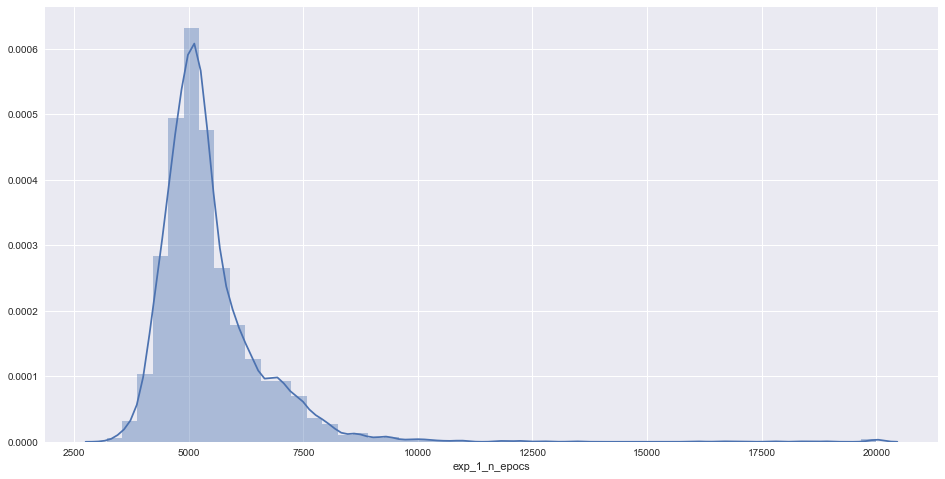

In [5]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(dat["exp_1_n_epocs"])
dat["exp_1_n_epocs"].describe()

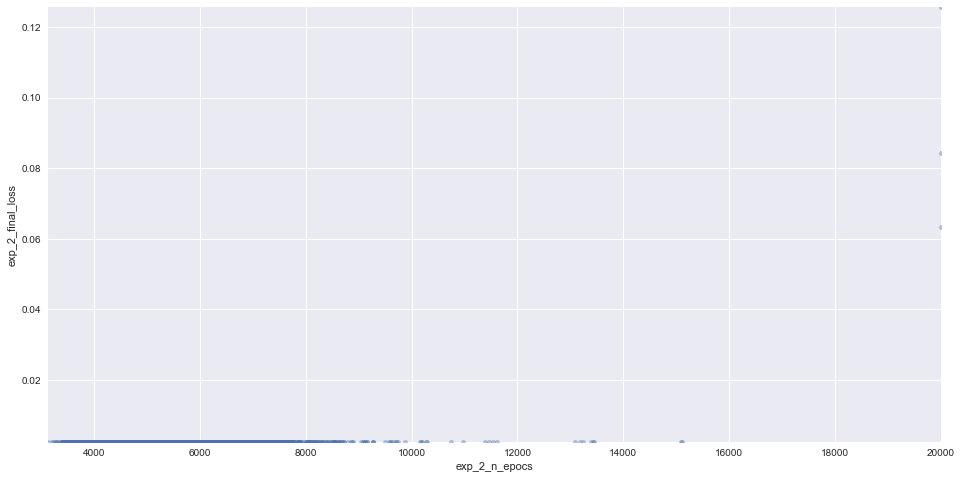

In [6]:
dat.plot.scatter(
    x='exp_2_n_epocs',
    y='exp_2_final_loss',
    ylim=(dat["exp_2_final_loss"].min(),dat["exp_2_final_loss"].max()),
    xlim=(dat["exp_2_n_epocs"].min(),dat["exp_2_n_epocs"].max()),
    figsize=(16,8),
    alpha=0.4
)

In [7]:
dat["exp_2_final_loss"].describe()

count    3992.000000
mean        0.002566
std         0.002529
min         0.002499
25%         0.002499
50%         0.002500
75%         0.002500
max         0.125685
Name: exp_2_final_loss, dtype: float64

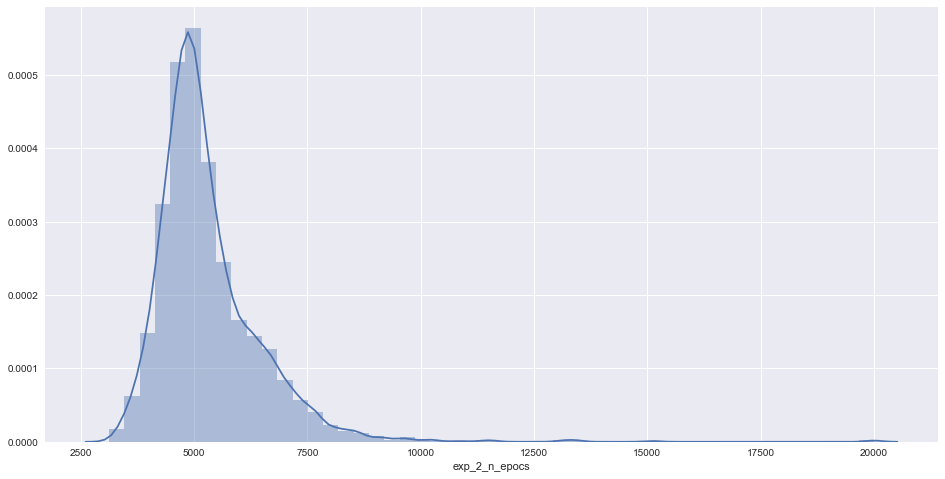

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(dat["exp_2_n_epocs"])

In [9]:
dat.iloc[:,1:12].describe()

,XY_1,YZ_1,XZ_1,A1B1_1,A1B2_1,B1C1_1,B1C2_1,A2B2_1,A2B1_1,B2C2_1,B2C1_1
count,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000
mean,0.994487,0.994441,0.994405,0.942567,0.057254,0.942572,0.056281,0.942275,0.057100,0.942070,0.057157
std,0.005562,0.005527,0.005574,0.014483,0.018860,0.014208,0.014704,0.013872,0.017732,0.013653,0.016272
min,0.954656,0.959580,0.960281,0.498596,0.013542,0.498720,0.016614,0.665262,0.015976,0.665357,0.015399
25%,0.992087,0.992047,0.991969,0.935745,0.049636,0.935777,0.048689,0.935562,0.049411,0.935483,0.049415
50%,0.996325,0.996183,0.996217,0.941827,0.057249,0.941873,0.057227,0.941761,0.057285,0.941447,0.057336
75%,0.998578,0.998517,0.998538,0.948266,0.064728,0.948200,0.064195,0.948048,0.064865,0.947598,0.065038
max,0.999951,0.999983,0.999972,0.983347,0.670575,0.983363,0.501629,0.983703,0.670206,0.981766,0.670625


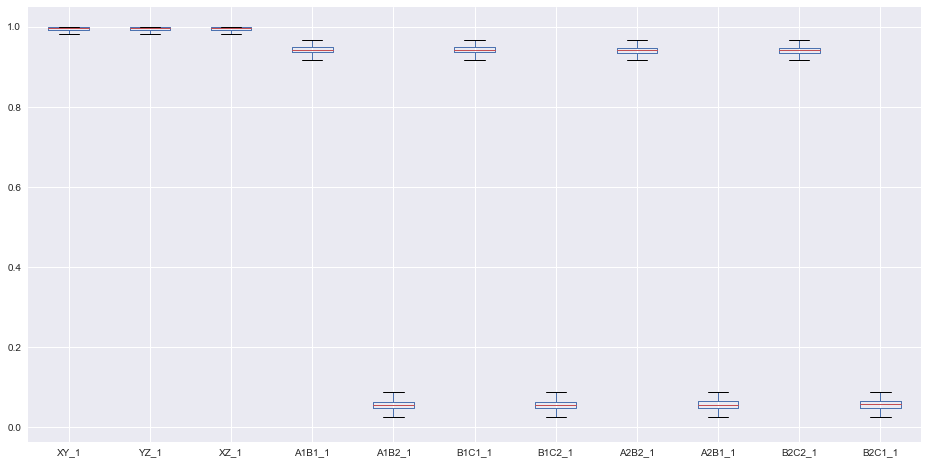

In [10]:
dat.iloc[:,1:12].plot(kind="box", figsize=(16,8))#, alpha=0.6)

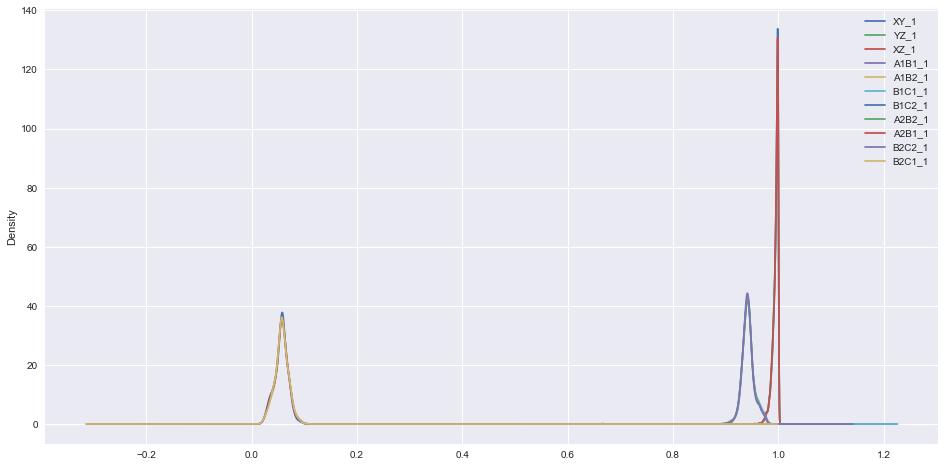

In [11]:
dat.iloc[:,1:12].plot(kind="density", figsize=(16,8))#, alpha=0.6)

In [12]:
dat.iloc[:,12:16].describe()

,A1C1_1,A1C2_1,A2C2_1,A2C1_1
count,3992.000000,3992.000000,3992.000000,3992.000000
mean,0.738291,0.349751,0.736387,0.354742
std,0.292319,0.294575,0.293775,0.296305
min,0.007612,0.013092,0.009058,0.009571
25%,0.592623,0.113407,0.592852,0.113845
50%,0.893455,0.220341,0.895835,0.229130
75%,0.948992,0.555985,0.947673,0.566660
max,0.998250,0.994799,0.998706,0.992644


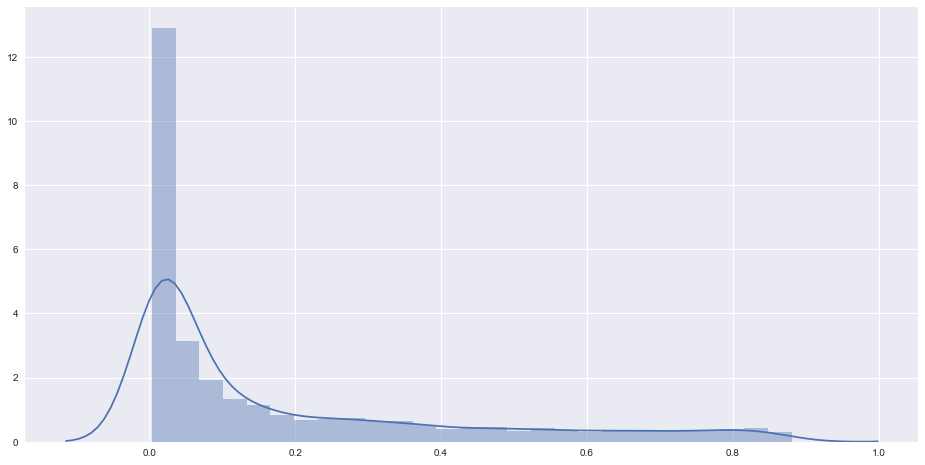

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(np.mean((dat.iloc[:,12:16]-test_1_y)**2, axis=1) )

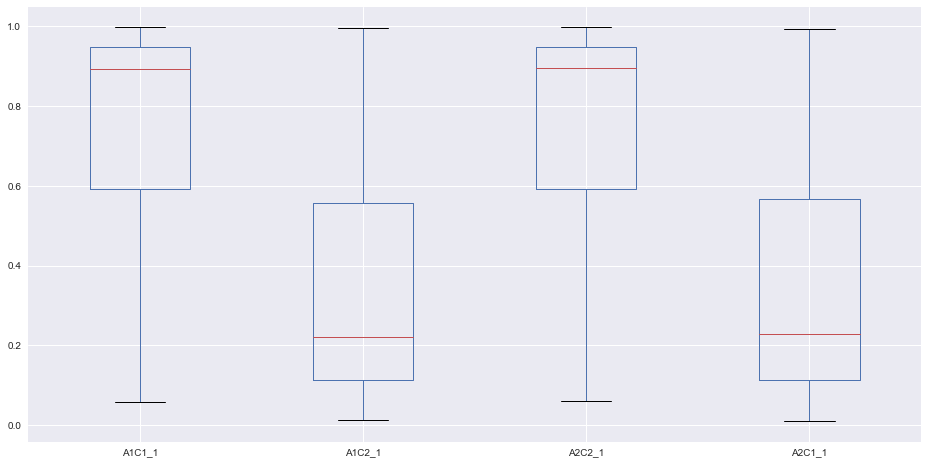

In [14]:
dat.iloc[:,12:16].plot(kind="box", figsize=(16,8))#, alpha=0.6)

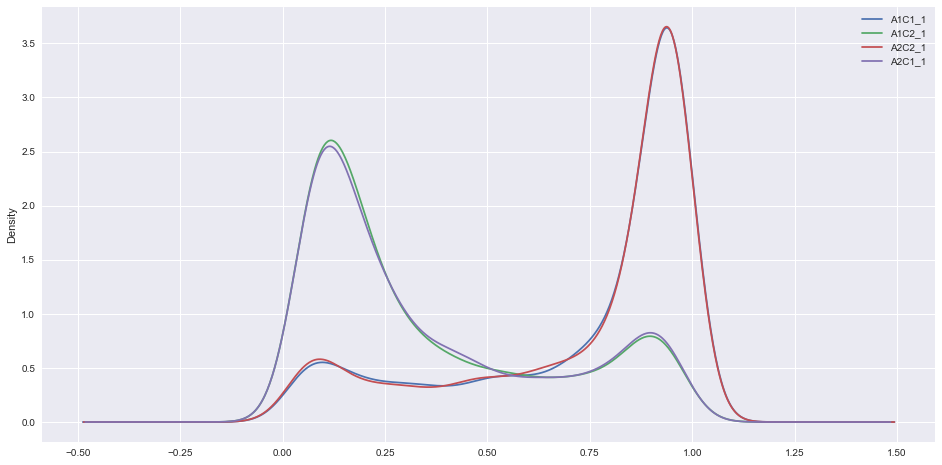

In [15]:
dat.iloc[:,12:16].plot.density(figsize=(16,8))

In [16]:
dat.iloc[:,18:26].describe()

,A1B1_2,A1B2_2,B1C1_2,B1C2_2,A2B2_2,A2B1_2,B2C2_2,B2C1_2
count,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000
mean,0.951458,0.048895,0.951555,0.048964,0.950752,0.048566,0.950978,0.048775
std,0.015112,0.015319,0.011402,0.012040,0.013145,0.012053,0.014978,0.013623
min,0.330594,0.002455,0.910443,0.008668,0.498868,0.009872,0.498214,0.012535
25%,0.944500,0.042800,0.944620,0.042981,0.944000,0.042760,0.944333,0.042556
50%,0.950553,0.049468,0.950703,0.049584,0.950121,0.049530,0.950211,0.049557
75%,0.957673,0.055477,0.957497,0.055716,0.956381,0.055484,0.956766,0.055751
max,0.993607,0.501282,0.988741,0.334050,0.987839,0.334355,0.986145,0.500736


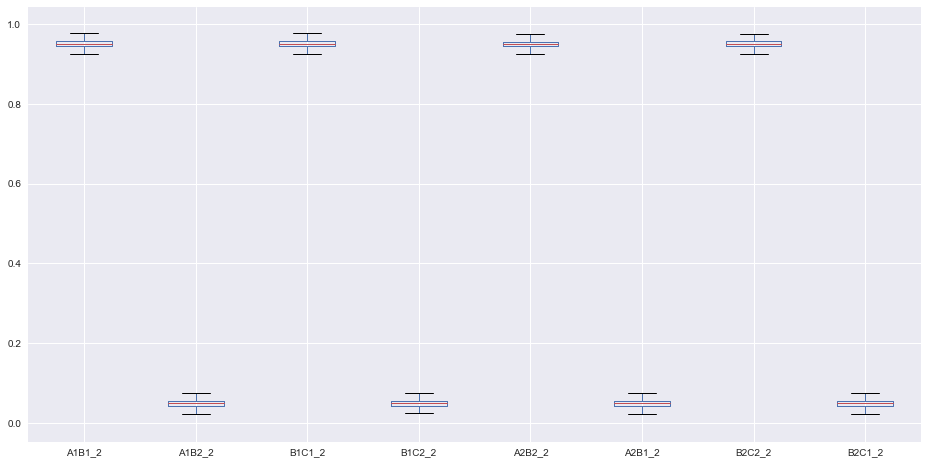

In [17]:
dat.iloc[:,18:26].plot(kind="box", figsize=(16,8))#, alpha=0.6)

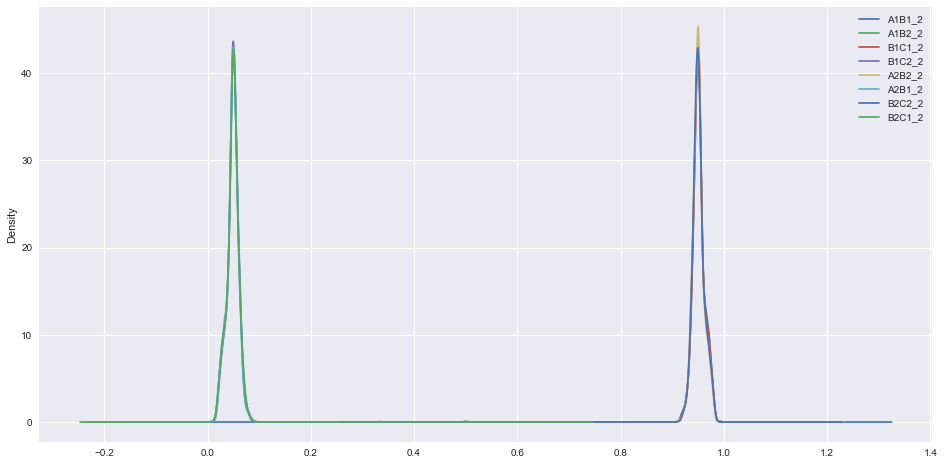

In [18]:
dat.iloc[:,18:26].plot(kind="density", figsize=(16,8))#, alpha=0.6)

In [19]:
dat.iloc[:,26:30].describe()

,A1C1_2,A1C2_2,A2C2_2,A2C1_2
count,3992.000000,3992.000000,3992.000000,3992.000000
mean,0.509399,0.494137,0.509055,0.488934
std,0.367117,0.349643,0.370109,0.351930
min,0.004025,0.009258,0.004307,0.012295
25%,0.106242,0.130800,0.103018,0.124125
50%,0.513766,0.488029,0.530219,0.472094
75%,0.905648,0.870335,0.907213,0.866125
max,0.992828,0.995672,0.995073,0.984652


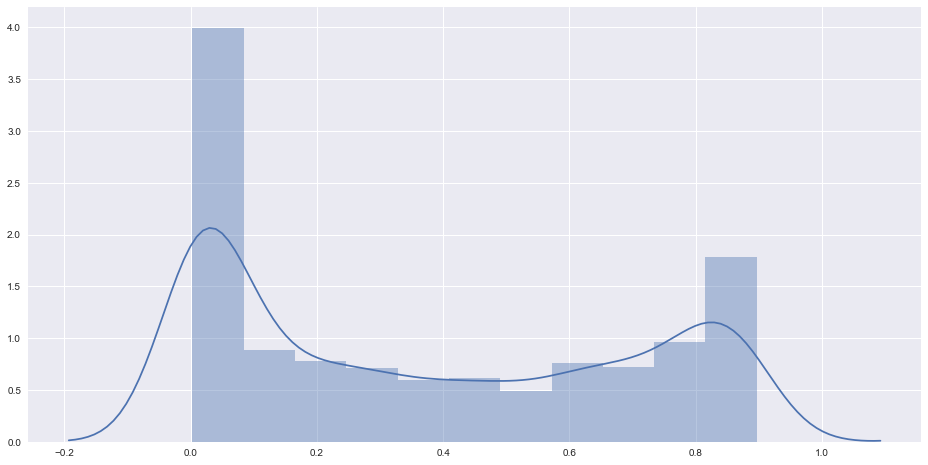

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(np.mean((dat.iloc[:,26:30]-test_1_y)**2, axis=1) )

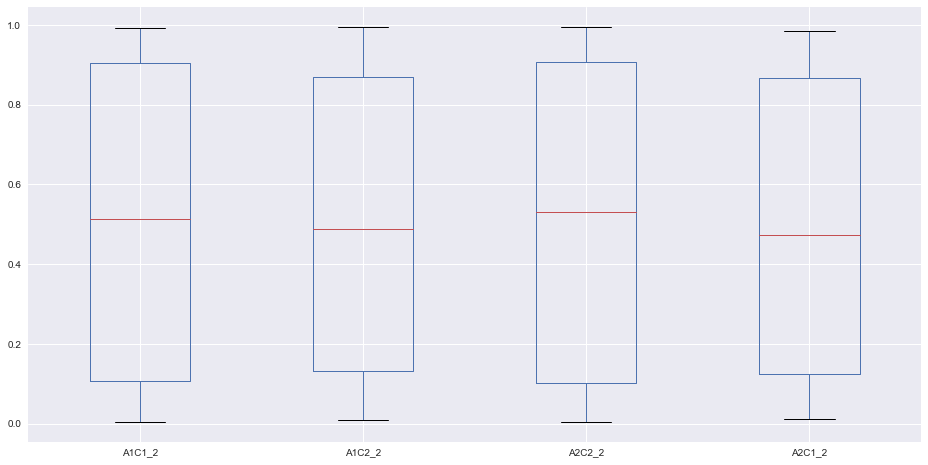

In [21]:
dat.iloc[:,26:30].plot(kind="box", figsize=(16,8))#, alpha=0.6)

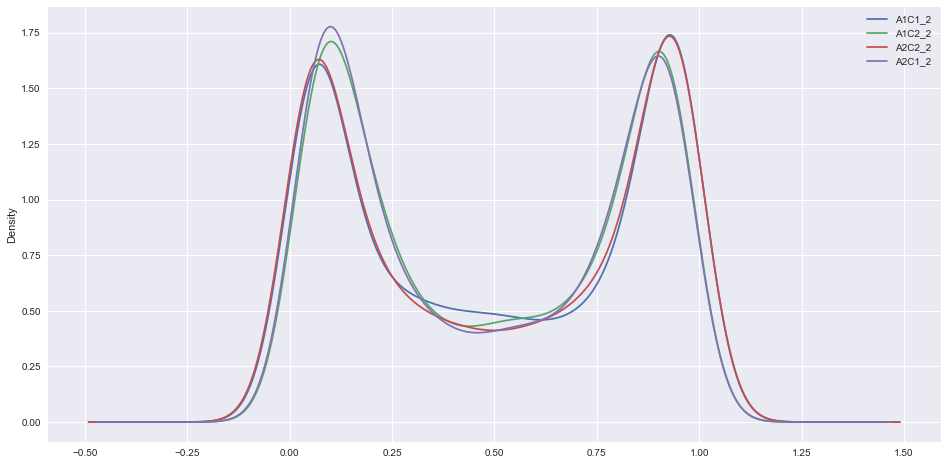

In [22]:
dat.iloc[:,26:30].plot(kind="density", figsize=(16,8))#, alpha=0.6)